# Euler on 1d SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''=========
option class init
=========='''
class EuropeanOption:
    def __init__(self,
                otype = 1, # 1: 'call'
                        # -1: 'put'
                strike = 110.,
                maturity = 1.
                ):
        self.otype = otype
        self.strike = strike
        self.maturity = 1.
        
    def payoff(self, s): #s: excercise price
        otype = self.otype
        k = self.strike
        maturity = self.maturity
        return np.max([0, (s - k)*otype])
        

In [3]:
'''=========
sde class init
=========='''

class SDE_1d:
    def __init__(self,
                init_state = 100.,
                drift = lambda x: 0.0475*x,
                vol = lambda x: 0.2*x
                ):
        self.init_state = init_state
        self.drift = drift
        self.vol = vol
        

In [4]:
'''=========
generate 1d bm path
========='''

def bm_1d_path(time_grid):
    step_size = np.diff(time_grid)
    dw = np.random.normal(0, np.sqrt(step_size)) #bm increment
    w = np.append([0], np.cumsum(dw)) #bm path
    return w

In [5]:
'''==========
euler method as a method of SDE_1d
input:
    time grid
    sde_1d_param
==========='''

def euler_1d(self, grid):
    #set SDE param
    x0 = self.init_state
    mu = self.drift
    sigma = self.vol
    
    #generate bm path
    w = bm_1d_path(grid)

    #initialize euler solution
    xh = x0 + np.zeros(grid.shape)
    #run euler
    for i in range(grid.size-1):
        dt = grid[i+1] - grid[i] #time step size
        dw = w[i+1] - w[i] #brownian increment
        xh[i+1] = xh[i] + mu(xh[i])*dt + sigma(xh[i])*dw #euler
        
    return xh

SDE_1d.euler = euler_1d

Test Euler method: 
We implement ordinary MC to find BSM call price, compare with exact price, see [bsm_formula](./bsm_formula.ipynb)

In [6]:
#initiate option and sde instances

option1 = EuropeanOption()
maturity = option1.maturity

sde1 = SDE_1d()

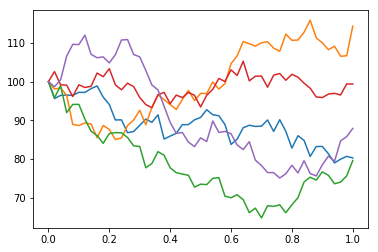

In [7]:
'''==========
plot euler paths
=========='''

time_grid = np.linspace(0, maturity, 51)

for i in range(5):
    xh = sde1.euler(time_grid)
    plt.plot(time_grid, xh)

In [8]:
'''
==========
option pricing based euler OMC
=========='''

r = sde1.drift(1)

num_step = 10
time_grid = np.linspace(0, maturity, num_step+1)

num_path = 10000
terminal_price = [sde1.euler(time_grid)[-1] for i in range(num_path)]


#compute call price
payoff = [option1.payoff(s) for s in terminal_price]
call_value = np.exp(-r*maturity)*np.average(payoff)

#compute put price
option1.otype = -1
payoff = [option1.payoff(s) for s in terminal_price]
put_value = np.exp(-r*maturity)*np.average(payoff)

In [9]:
print('call price is ' + str(call_value))
print('put price is ' + str(put_value))

call price is 5.779600089651798
put price is 10.834311315540855
